<a href="https://colab.research.google.com/github/AilingLiu/From-Business-Insights-to-Action/blob/master/Market_Segmentation_By_CLV_and_Insurance_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
insurance = pd.read_csv('https://github.com/AilingLiu/Growth_Analysis/blob/master/Data/Insurance_Marketing_Customer_Value_Analysis.txt?raw=true', sep=',')
insurance.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer_Lifetime_Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception    9134 non-null int64
Number_of_Open_Complaints        9134 non-null int64
Number_of_Policies               

## Response Rate by policy age and clv

step 1: bucket clv into high and low, policy age into high and low

In [31]:
insurance['CLV_bins'] = pd.qcut(insurance['Customer_Lifetime_Value'], q=[0, 0.5, 1], labels=['Low', 'High'])
insurance['Policy_bins'] = pd.qcut(insurance['Months_Since_Policy_Inception'], q=[0, 0.5, 1], labels=['Low', 'High'])
engagement_rate = insurance.groupby(['CLV_bins', 'Policy_bins'])['Response'].value_counts(normalize=True)
engagement_rate

CLV_bins  Policy_bins  Response
Low       Low          No          0.860043
                       Yes         0.139957
          High         No          0.837550
                       Yes         0.162450
High      Low          No          0.867933
                       Yes         0.132067
          High         No          0.861272
                       Yes         0.138728
Name: Response, dtype: float64

In [32]:
engagement_rate.unstack(fill_value=0).round(2)

Response                No   Yes
CLV_bins Policy_bins            
Low      Low          0.86  0.14
         High         0.84  0.16
High     Low          0.87  0.13
         High         0.86  0.14

step 2: visulisation

Text(0.5, 1.0, 'Segement by CLV and Policy Age')

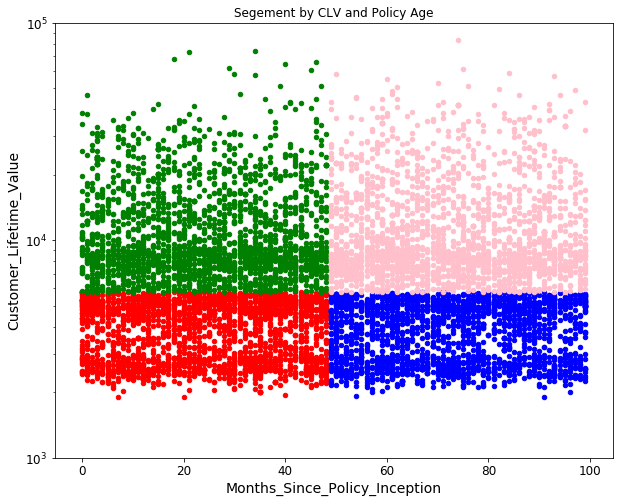

In [38]:
import seaborn as sns
def vis_seg(clv_bin, policy_bin, color, data, ax=None):
  if ax is None:
    return data.loc[(data['CLV_bins']==clv_bin)&(data['Policy_bins']==policy_bin)].plot(kind='scatter',
                                                                                        figsize=(10, 8),
                                                                                        x='Months_Since_Policy_Inception',
                                                                                        y='Customer_Lifetime_Value',
                                                                                        logy=True,
                                                                                        color=color)
  else:
    return data.loc[(data['CLV_bins']==clv_bin)&(data['Policy_bins']==policy_bin)].plot(kind='scatter',
                                                                                        figsize=(10, 8),
                                                                                        x='Months_Since_Policy_Inception',
                                                                                        y='Customer_Lifetime_Value',
                                                                                        logy=True,
                                                                                        color=color,
                                                                                        ax=ax)

ax1=vis_seg(clv_bin='Low', policy_bin='Low', color='red', data=insurance)
ax2=vis_seg(clv_bin='Low', policy_bin='High', color='blue', data=insurance, ax=ax1)
ax3=vis_seg(clv_bin='High', policy_bin='Low', color='green', data=insurance, ax=ax2)
ax4=vis_seg(clv_bin='High', policy_bin='High', color='pink', data=insurance, ax=ax3)
plt.ylim((1000, 100000))
plt.title('Segement by CLV and Policy Age')